Hyperparameter Tuning using Bayesian Optmization


Bayesian optimization uses a probabilistic model to predict the performance of different hyperparameter configurations. It then selects configurations that are more likely to lead to improved results, making it an efficient and effective technique.

In [2]:
#install dependencies
!pip install scikit-optimize optuna



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
#import the necessary libraries and the dataset from sklearn.dataset
import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits #the dataset 
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.space import Integer,Categorical

In [4]:
#STEP1 : load the dataset
data_set = load_digits()
X, y = data_set.data, data_set.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
rf_model = RandomForestClassifier(random_state=42) #defining the model
#here this ensemble learning method is used for multiclass classification(digit recognition)

In [ ]:
# peform hyperparameter tuning with grid search
grid_params = {
    'n_estimators': [50, 100], # number of decision trees in the Random Forest.
    'max_depth': [10, 15, None],   #max depth of each tree
    'min_samples_split': [2, 4]  #min samples to split a node.
}

grid_search = GridSearchCV(rf_model, grid_params, cv=5, n_jobs=-1) #cv stands for cross validation
grid_search.fit(X_train, y_train)
grid_best_params = grid_search.best_params_
grid_best_acc = accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))

print("Grid Search Best Params:", grid_best_params)
print("Grid Search Accuracy:", grid_best_acc)

Grid Search Best Params: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}
Grid Search Accuracy: 0.9740740740740741


In [ ]:
#now random search
random_params = {
    'n_estimators': np.arange(50, 150, 50),
    'max_depth': [10, 15, None],
    'min_samples_split': np.arange(2, 10, 2)
}
#randomisedSearch: randomly selects a subset of hyperparameter combinations instead of searching exhaustively.
random_search = RandomizedSearchCV(rf_model, random_params, n_iter=15, cv=5, n_jobs=-1, random_state=42) 
random_search.fit(X_train, y_train)
random_best_params = random_search.best_params_
random_best_acc = accuracy_score(y_test, random_search.best_estimator_.predict(X_test))

print("Random Search Best Params:", random_best_params)
print("Random Search Accuracy:", random_best_acc)


Random Search Best Params: {'n_estimators': np.int64(50), 'min_samples_split': np.int64(2), 'max_depth': 15}
Random Search Accuracy: 0.9740740740740741


Randomised search is faster than grid search as it samples a subset of parameters.

In [21]:
#bayesian optimisation
bayesian_params = {
    'n_estimators': Integer(50, 250),
    'max_depth': Integer(10, 25),
    'min_samples_split': Integer(2, 10)
}

bayesian_search = BayesSearchCV(rf_model, bayesian_params, n_iter=100, n_points=10, cv=5, n_jobs=-1, random_state=42)
bayesian_search.fit(X_train, y_train)
bayesian_best_params = bayesian_search.best_params_
bayesian_best_acc = accuracy_score(y_test, bayesian_search.best_estimator_.predict(X_test))

print("Bayesian Search Best Params:", bayesian_best_params)
print("Bayesian Search Accuracy:", bayesian_best_acc)


Bayesian Search Best Params: OrderedDict({'max_depth': 25, 'min_samples_split': 4, 'n_estimators': 238})
Bayesian Search Accuracy: 0.9740740740740741


In [22]:
#comparing the results
results = {
    "Grid Search": grid_best_acc,
    "Random Search": random_best_acc,
    "Bayesian Optimization": bayesian_best_acc
}

print("\nComparison of Methods:")
for method, acc in results.items():
    print(f"{method}: {acc:.4f}")


Comparison of Methods:
Grid Search: 0.9741
Random Search: 0.9759
Bayesian Optimization: 0.9741


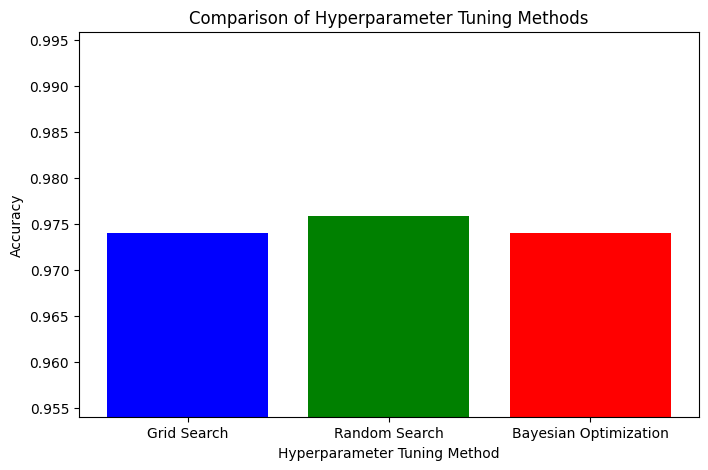

In [ ]:
#Bar Chart Comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.xlabel("Hyperparameter Tuning Method")
plt.ylabel("Accuracy")
plt.title("Comparison of Hyperparameter Tuning Methods")
plt.ylim([min(results.values()) - 0.02, max(results.values()) + 0.02])
plt.show()